In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime

import astropy.units as u
from astropy.time import Time
from astropy.table import Table
from astropy.timeseries import TimeSeries
from astropy.visualization import quantity_support, time_support

## CDAWeb

### OMNI_HRO2_5MIN (pandas)

In [ ]:
file = 'data/OMNI_HRO2_5MIN_3729811.txt'
full_txt = open(file, 'r')

In [ ]:
line = full_txt.readline()
print(type(line))
print(line)

<class 'str'>
#              ************************************



In [ ]:
line = full_txt.readline()
print(type(line))
print(line)

<class 'str'>
#              *****    GLOBAL ATTRIBUTES    ******



In [ ]:
full_txt.close()

In [ ]:
file = 'data/OMNI_HRO2_5MIN_3729811.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    line = full_txt.readline()
    if not line:
        break
    if "#" not in line:
        row += 1
        columns = line.split()
        print(row, columns, end='\n\n')
        if row == 1: header = columns
        elif row == 2: units = columns
    if row > 5:
        break
full_txt.close()

1 ['EPOCH_TIME', 'BY,_GSM', 'BZ,_GSM', 'FLOW_SPEED,_GSE', 'PROTON_DENSITY', 'FLOW_PRESSURE', 'X_(BSN),_GSE', '5-M_AE', 'SYM/H_INDEX']

2 ['dd-mm-yyyy', 'hh:mm:ss.ms', 'nT', 'nT', 'km/s', 'n/cc', 'nPa', 'Re', 'nT', 'nT']

3 ['10-05-2024', '00:00:00.000', '5.26000', '-2.15000', '99999.9', '999.990', '99.9900', '13.0300', '117', '6']

4 ['10-05-2024', '00:05:00.000', '5.24000', '-2.16000', '99999.9', '999.990', '99.9900', '13.0300', '123', '5']

5 ['10-05-2024', '00:10:00.000', '5.05000', '-2.44000', '99999.9', '999.990', '99.9900', '13.0100', '131', '4']

6 ['10-05-2024', '00:15:00.000', '4.79000', '-2.99000', '99999.9', '999.990', '99.9900', '12.9500', '152', '3']



In [ ]:
print(header)
print(units)

['EPOCH_TIME', 'BY,_GSM', 'BZ,_GSM', 'FLOW_SPEED,_GSE', 'PROTON_DENSITY', 'FLOW_PRESSURE', 'X_(BSN),_GSE', '5-M_AE', 'SYM/H_INDEX']
['dd-mm-yyyy', 'hh:mm:ss.ms', 'nT', 'nT', 'km/s', 'n/cc', 'nPa', 'Re', 'nT', 'nT']


In [ ]:
# date, time, 'BY_GSM', 'BZ_GSM', 'FLOW_SPEED_GSE', 'PROTON_DENSITY', 'FLOW_PRESSURE', 'X_(BSN)_GSE', '5-M_AE', 'SYM/H_INDEX'
# dd-mm-yyyy, hh:mm:ss.ms, nT, nT, 'km/s', 'n/cc', 'nPa', 'Re', 'nT', 'nT'
print(columns)

['10-05-2024', '00:15:00.000', '4.79000', '-2.99000', '99999.9', '999.990', '99.9900', '12.9500', '152', '3']


In [ ]:
data = {
    'BY_GSM': [],
    'BZ_GSM': [],
    'FLOW_SPEED_GSE': [],
    'PROTON_DENSITY': [],
    'FLOW_PRESSURE': [],
    'AE': [],
    'SYM_H': [],
    'X_GSE': [],
}

dates = []
times = []

In [ ]:
file = 'data/OMNI_HRO2_5MIN_3729811.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    line = full_txt.readline()
    if not line:
        break
    
    if "#" not in line:
        row += 1
        columns = line.split()

        if row == 1: header = columns
        elif row == 2: units = columns
        else:
            dates.append(columns[0])
            times.append(columns[1])
            data['BY_GSM'].append(float(columns[2]))
            data['BZ_GSM'].append(float(columns[3]))
            data['FLOW_SPEED_GSE'].append(float(columns[4]))
            data['PROTON_DENSITY'].append(float(columns[5]))
            data['FLOW_PRESSURE'].append(float(columns[6]))
            data['X_GSE'].append(float(columns[7]))
            data['AE'].append(float(columns[8]))
            data['SYM_H'].append(float(columns[9]))
full_txt.close()

In [ ]:
date_time = dates[0]+'T'+times[0]
date_time

'10-05-2024T00:00:00.000'

In [ ]:
date_time = date_time[:-4]
date_time

'10-05-2024T00:00:00'

In [ ]:
datetime.datetime.strptime(date_time, '%d-%m-%YT%H:%M:%S')

datetime.datetime(2024, 5, 10, 0, 0)

In [ ]:
data['EPOCH_TIME'] = []

for i in range(len(dates)):
    date_time = dates[i] + 'T' + times[i]
    date_time = date_time[:-4]
    dt = datetime.datetime.strptime(date_time, '%d-%m-%YT%H:%M:%S')
    data['EPOCH_TIME'].append(dt)

In [ ]:
data.keys()

dict_keys(['BY_GSM', 'BZ_GSM', 'FLOW_SPEED_GSE', 'PROTON_DENSITY', 'FLOW_PRESSURE', 'AE', 'SYM_H', 'X_GSE', 'EPOCH_TIME'])

In [ ]:
df = pd.DataFrame(data)
df = df.set_index('EPOCH_TIME')
df

,BY_GSM,BZ_GSM,FLOW_SPEED_GSE,PROTON_DENSITY,FLOW_PRESSURE,AE,SYM_H,X_GSE
EPOCH_TIME,,,,,,,,
2024-05-10 00:00:00,5.26,-2.15,99999.9,999.99,99.99,117.0,6.0,13.03
2024-05-10 00:05:00,5.24,-2.16,99999.9,999.99,99.99,123.0,5.0,13.03
2024-05-10 00:10:00,5.05,-2.44,99999.9,999.99,99.99,131.0,4.0,13.01
2024-05-10 00:15:00,4.79,-2.99,99999.9,999.99,99.99,152.0,3.0,12.95
2024-05-10 00:20:00,4.87,-2.91,409.7,5.12,1.72,165.0,2.0,12.97
...,...,...,...,...,...,...,...,...
2024-05-14 23:40:00,0.65,1.25,504.6,0.81,0.42,45.0,-49.0,17.04
2024-05-14 23:45:00,0.99,1.53,496.5,0.84,0.42,51.0,-49.0,16.98
2024-05-14 23:50:00,1.88,1.17,507.7,0.80,0.41,50.0,-49.0,17.01


In [ ]:
df.describe()

,BY_GSM,BZ_GSM,FLOW_SPEED_GSE,PROTON_DENSITY,FLOW_PRESSURE,AE,SYM_H,X_GSE
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,77.589389,73.658869,18395.728383,185.120833,24.532859,561.181818,-115.907009,88.169320
std,870.616368,870.962477,38032.683728,379.887812,36.376540,2673.859137,109.637805,869.631368
min,-63.000000,-44.520000,390.300000,0.490000,0.310000,29.000000,-497.000000,4.060000
25%,-0.880000,-3.470000,570.800000,2.730000,2.360000,93.000000,-148.000000,10.110000
50%,0.890000,0.860000,742.400000,6.450000,6.090000,290.000000,-74.000000,12.070000
75%,3.470000,3.520000,893.400000,23.970000,25.350000,731.000000,-52.000000,13.870000
max,9999.990000,9999.990000,99999.900000,999.990000,99.990000,99999.000000,79.000000,9999.990000


In [ ]:
df['BY_GSM'] = df['BY_GSM'].replace(9999.99, np.nan)
df['BZ_GSM'] = df['BZ_GSM'].replace(9999.99, np.nan)
df['FLOW_SPEED_GSE'] = df['FLOW_SPEED_GSE'].replace(99999.9, np.nan)
df['PROTON_DENSITY'] = df['PROTON_DENSITY'].replace(999.99, np.nan)
df['FLOW_PRESSURE'] = df['FLOW_PRESSURE'].replace(99.99, np.nan)
df['X_GSE'] = df['X_GSE'].replace(9999.99, np.nan)
df['AE'] = df['AE'].replace(99999, np.nan)
df.describe()

,BY_GSM,BZ_GSM,FLOW_SPEED_GSE,PROTON_DENSITY,FLOW_PRESSURE,AE,SYM_H,X_GSE
count,1430.000000,1430.000000,1184.000000,1184.000000,1184.000000,1440.000000,1441.000000,1430.000000
mean,1.263231,-2.697524,682.660726,8.244671,8.154071,492.127778,-115.907009,11.924545
std,10.442317,10.549682,159.983661,10.095398,10.261047,527.602517,109.637805,3.073592
min,-63.000000,-44.520000,390.300000,0.490000,0.310000,29.000000,-497.000000,4.060000
25%,-0.897500,-3.497500,546.275000,2.040000,1.720000,93.000000,-148.000000,10.100000
50%,0.865000,0.800000,697.300000,4.975000,4.080000,290.000000,-74.000000,12.060000
75%,3.450000,3.480000,816.750000,8.960000,9.620000,730.250000,-52.000000,13.817500
max,68.820000,43.380000,1027.400000,65.860000,66.440000,3540.000000,79.000000,18.310000


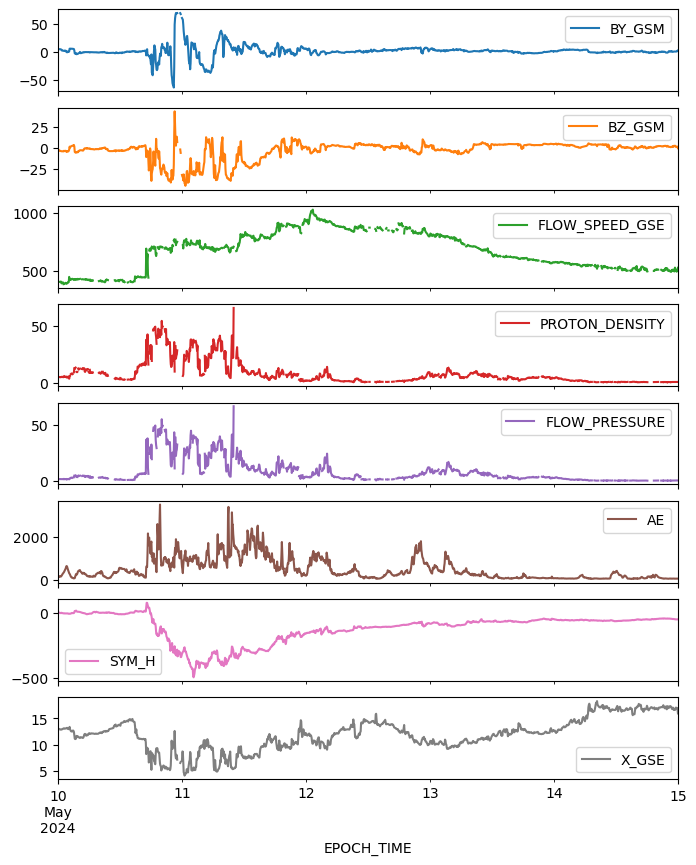

In [ ]:
df.plot(subplots=True, figsize=(8, 10));

### OMNI_HRO2_5MIN (astropy.timeseries)

In [ ]:
df.index

DatetimeIndex(['2024-05-10 00:00:00', '2024-05-10 00:05:00',
               '2024-05-10 00:10:00', '2024-05-10 00:15:00',
               '2024-05-10 00:20:00', '2024-05-10 00:25:00',
               '2024-05-10 00:30:00', '2024-05-10 00:35:00',
               '2024-05-10 00:40:00', '2024-05-10 00:45:00',
               ...
               '2024-05-14 23:15:00', '2024-05-14 23:20:00',
               '2024-05-14 23:25:00', '2024-05-14 23:30:00',
               '2024-05-14 23:35:00', '2024-05-14 23:40:00',
               '2024-05-14 23:45:00', '2024-05-14 23:50:00',
               '2024-05-14 23:55:00', '2024-05-15 00:00:00'],
              dtype='datetime64[ns]', name='EPOCH_TIME', length=1441, freq=None)

In [ ]:
file = 'data/OMNI_HRO2_5MIN_3729811.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    line = full_txt.readline()
    if not line:
        break
    
    if "#" not in line:
        row += 1
        columns = line.split()

        if row == 1: header = columns
        elif row == 2: units = columns
        elif row == 3:
            break
full_txt.close()

In [ ]:
print(header)
print(units)
print(columns)

['EPOCH_TIME', 'BY,_GSM', 'BZ,_GSM', 'FLOW_SPEED,_GSE', 'PROTON_DENSITY', 'FLOW_PRESSURE', 'X_(BSN),_GSE', '5-M_AE', 'SYM/H_INDEX']
['dd-mm-yyyy', 'hh:mm:ss.ms', 'nT', 'nT', 'km/s', 'n/cc', 'nPa', 'Re', 'nT', 'nT']
['10-05-2024', '00:00:00.000', '5.26000', '-2.15000', '99999.9', '999.990', '99.9900', '13.0300', '117', '6']


In [ ]:
columns[0]

'10-05-2024'

In [ ]:
columns[0][-4:], columns[0][3:5], columns[0][:2]

('2024', '05', '10')

In [ ]:
date_time = columns[0][-4:] + '-' + columns[0][3:5] + '-' + columns[0][:2] + ' ' + columns[1]
date_time

'2024-05-10 00:00:00.000'

In [ ]:
Time(date_time, format='iso')

<Time object: scale='utc' format='iso' value=2024-05-10 00:00:00.000>

In [ ]:
t = Table.from_pandas(df)
ts = TimeSeries(time=Time(df.index), data=t)
ts

time,BY_GSM,BZ_GSM,FLOW_SPEED_GSE,PROTON_DENSITY,FLOW_PRESSURE,AE,SYM_H,X_GSE
Time,float64,float64,float64,float64,float64,float64,float64,float64
2024-05-10T00:00:00.000000000,5.26,-2.15,--,--,--,117.0,6.0,13.03
2024-05-10T00:05:00.000000000,5.24,-2.16,--,--,--,123.0,5.0,13.03
2024-05-10T00:10:00.000000000,5.05,-2.44,--,--,--,131.0,4.0,13.01
2024-05-10T00:15:00.000000000,4.79,-2.99,--,--,--,152.0,3.0,12.95
2024-05-10T00:20:00.000000000,4.87,-2.91,409.7,5.12,1.72,165.0,2.0,12.97
2024-05-10T00:25:00.000000000,4.65,-3.44,410.1,5.02,1.69,141.0,1.0,12.88
2024-05-10T00:30:00.000000000,4.77,-3.4,411.6,5.21,1.77,145.0,0.0,12.86
2024-05-10T00:35:00.000000000,4.39,-3.53,411.7,5.09,1.73,146.0,-1.0,12.87
2024-05-10T00:40:00.000000000,3.95,-3.65,397.4,5.38,1.7,171.0,2.0,12.86


In [ ]:
times = []

file = 'data/OMNI_HRO2_5MIN_3729811.txt'
full_txt = open(file, 'r')
row = 0
while True:
    line = full_txt.readline()
    if not line:
        break
    
    if "#" not in line:
        row += 1
        columns = line.split()

        if row == 1: header = columns
        elif row == 2: units = columns
        else:
            date_time = columns[0][-4:] + '-' + columns[0][3:5] + '-' + columns[0][:2] + ' ' + columns[1]
            date_time = Time(date_time, format='iso')
            times.append(date_time)
full_txt.close()

In [ ]:
df

,BY_GSM,BZ_GSM,FLOW_SPEED_GSE,PROTON_DENSITY,FLOW_PRESSURE,AE,SYM_H,X_GSE
EPOCH_TIME,,,,,,,,
2024-05-10 00:00:00,5.26,-2.15,NaN,NaN,NaN,117.0,6.0,13.03
2024-05-10 00:05:00,5.24,-2.16,NaN,NaN,NaN,123.0,5.0,13.03
2024-05-10 00:10:00,5.05,-2.44,NaN,NaN,NaN,131.0,4.0,13.01
2024-05-10 00:15:00,4.79,-2.99,NaN,NaN,NaN,152.0,3.0,12.95
2024-05-10 00:20:00,4.87,-2.91,409.7,5.12,1.72,165.0,2.0,12.97
...,...,...,...,...,...,...,...,...
2024-05-14 23:40:00,0.65,1.25,504.6,0.81,0.42,45.0,-49.0,17.04
2024-05-14 23:45:00,0.99,1.53,496.5,0.84,0.42,51.0,-49.0,16.98
2024-05-14 23:50:00,1.88,1.17,507.7,0.80,0.41,50.0,-49.0,17.01


In [ ]:
t = Table.from_pandas(df)
t

BY_GSM,BZ_GSM,FLOW_SPEED_GSE,PROTON_DENSITY,FLOW_PRESSURE,AE,SYM_H,X_GSE
float64,float64,float64,float64,float64,float64,float64,float64
5.26,-2.15,--,--,--,117.0,6.0,13.03
5.24,-2.16,--,--,--,123.0,5.0,13.03
5.05,-2.44,--,--,--,131.0,4.0,13.01
4.79,-2.99,--,--,--,152.0,3.0,12.95
4.87,-2.91,409.7,5.12,1.72,165.0,2.0,12.97
4.65,-3.44,410.1,5.02,1.69,141.0,1.0,12.88
4.77,-3.4,411.6,5.21,1.77,145.0,0.0,12.86
4.39,-3.53,411.7,5.09,1.73,146.0,-1.0,12.87
3.95,-3.65,397.4,5.38,1.7,171.0,2.0,12.86


In [ ]:
ts = TimeSeries(time=times, data=t)
ts

time,BY_GSM,BZ_GSM,FLOW_SPEED_GSE,PROTON_DENSITY,FLOW_PRESSURE,AE,SYM_H,X_GSE
Time,float64,float64,float64,float64,float64,float64,float64,float64
2024-05-10 00:00:00.000,5.26,-2.15,--,--,--,117.0,6.0,13.03
2024-05-10 00:05:00.000,5.24,-2.16,--,--,--,123.0,5.0,13.03
2024-05-10 00:10:00.000,5.05,-2.44,--,--,--,131.0,4.0,13.01
2024-05-10 00:15:00.000,4.79,-2.99,--,--,--,152.0,3.0,12.95
2024-05-10 00:20:00.000,4.87,-2.91,409.7,5.12,1.72,165.0,2.0,12.97
2024-05-10 00:25:00.000,4.65,-3.44,410.1,5.02,1.69,141.0,1.0,12.88
2024-05-10 00:30:00.000,4.77,-3.4,411.6,5.21,1.77,145.0,0.0,12.86
2024-05-10 00:35:00.000,4.39,-3.53,411.7,5.09,1.73,146.0,-1.0,12.87
2024-05-10 00:40:00.000,3.95,-3.65,397.4,5.38,1.7,171.0,2.0,12.86


In [ ]:
ts['BY_GSM'].unit = u.nT
ts['BZ_GSM'].unit = u.nT
ts['FLOW_SPEED_GSE'].unit = u.km/u.s
ts['PROTON_DENSITY'].unit = u.cm**-3
ts['FLOW_PRESSURE'].unit = u.nPa
ts['X_GSE'].unit = u.Rearth
ts['AE'].unit = u.nT
ts['SYM_H'].unit = u.nT
ts

time,BY_GSM,BZ_GSM,FLOW_SPEED_GSE,PROTON_DENSITY,FLOW_PRESSURE,AE,SYM_H,X_GSE
,nT,nT,km / s,1 / cm3,nPa,nT,nT,earthRad
Time,float64,float64,float64,float64,float64,float64,float64,float64
2024-05-10 00:00:00.000,5.26,-2.15,———,———,———,117.0,6.0,13.03
2024-05-10 00:05:00.000,5.24,-2.16,———,———,———,123.0,5.0,13.03
2024-05-10 00:10:00.000,5.05,-2.44,———,———,———,131.0,4.0,13.01
2024-05-10 00:15:00.000,4.79,-2.99,———,———,———,152.0,3.0,12.95
2024-05-10 00:20:00.000,4.87,-2.91,409.7,5.12,1.72,165.0,2.0,12.97
2024-05-10 00:25:00.000,4.65,-3.44,410.1,5.02,1.69,141.0,1.0,12.88
2024-05-10 00:30:00.000,4.77,-3.4,411.6,5.21,1.77,145.0,0.0,12.86
2024-05-10 00:35:00.000,4.39,-3.53,411.7,5.09,1.73,146.0,-1.0,12.87


In [ ]:
list(ts.columns)[1:]

['BY_GSM',
 'BZ_GSM',
 'FLOW_SPEED_GSE',
 'PROTON_DENSITY',
 'FLOW_PRESSURE',
 'AE',
 'SYM_H',
 'X_GSE']

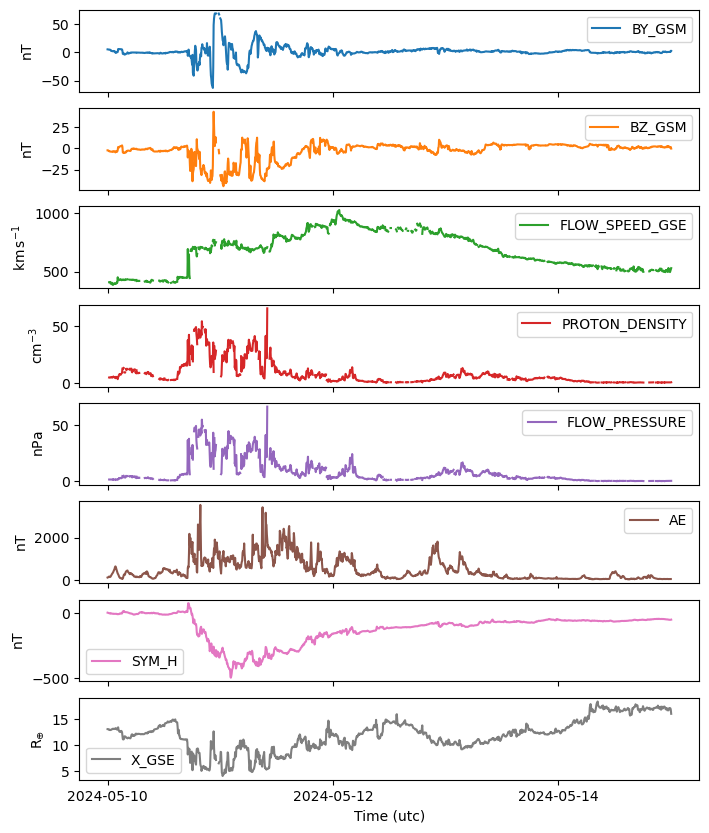

In [ ]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
with quantity_support():
    with time_support():
        fig = plt.figure(figsize=(8, 10))
        axes = fig.subplots(nrows=len(list(ts.columns)[1:]), sharex=True)
        axes = axes.flatten()
        for i, lbl in enumerate(list(ts.columns)[1:]):
            axes[i].plot(ts.time, ts[lbl], label=lbl, color=colors[i])
            axes[i].legend()
        plt.show()

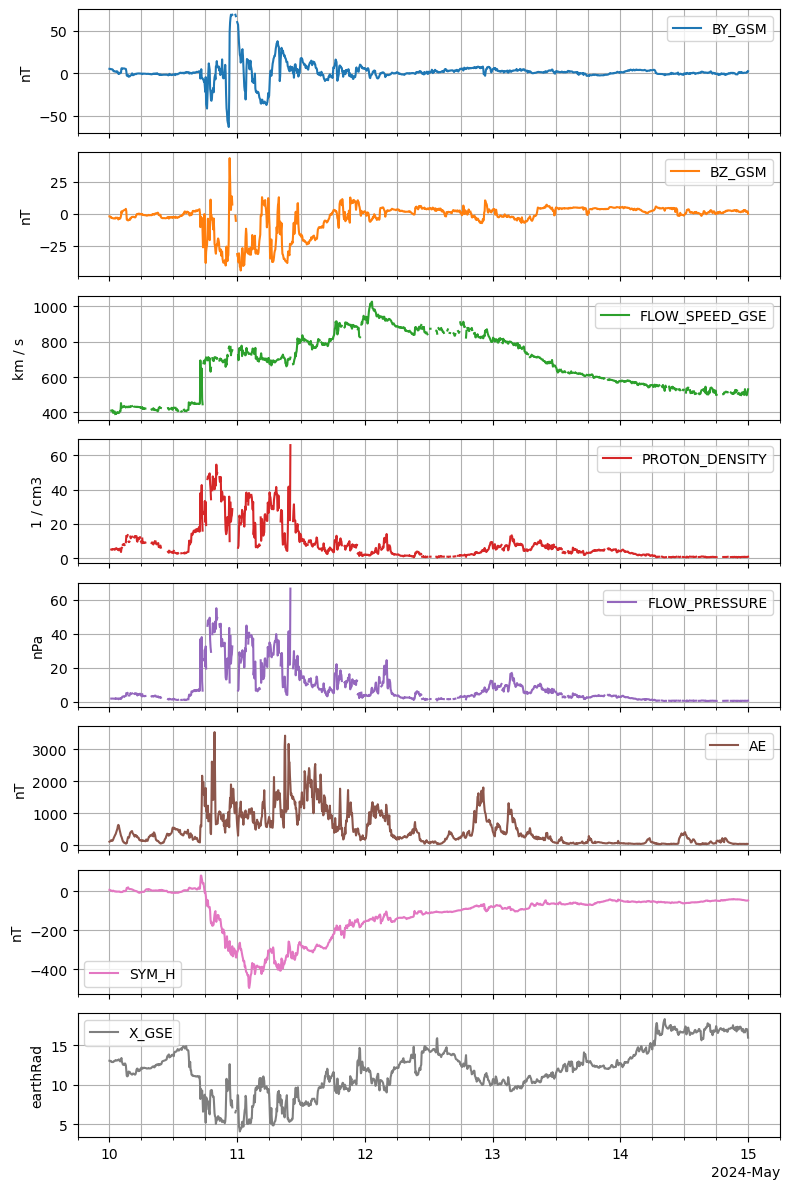

In [ ]:
fig = plt.figure(figsize=(8, 12))
axes = fig.subplots(nrows=len(list(ts.columns)[1:]), sharex=True)
axes = axes.flatten()
for i, lbl in enumerate(list(ts.columns)[1:]):
    axes[i].plot(ts.time.datetime, ts[lbl].value, label=lbl, color=colors[i])
    axes[i].set_ylabel(f'{ts[lbl].unit}')
    axes[i].legend()
    axes[i].grid(which='both')
locator = mdates.DayLocator()
formatter = mdates.ConciseDateFormatter(locator)
axes[-1].xaxis.set_major_locator(locator)
axes[-1].xaxis.set_major_formatter(formatter)
locator = mdates.HourLocator(byhour=range(0, 24, 6))
axes[-1].xaxis.set_minor_locator(locator)
fig.tight_layout()
plt.show()

### OMNI2_H0_MRG1HR

In [ ]:
file = 'data/OMNI2_H0_MRG1HR_3729811.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    line = full_txt.readline()
    if not line:
        break
    
    if "#" not in line:
        row += 1
        columns = line.split()

        if row == 1: header = columns
        elif row == 2: units = columns
        elif row == 3:
            break
full_txt.close()

In [ ]:
print(header)
print(units)
print(columns)

['TIME_AT_CENTER_OF_HOUR', '1AU_IP_BY,_GSM', '1AU_IP_BZ,_GSM', '1AU_IP_N_(ION)', '1AU_IP_PLASMA_SPEED', '1AU_IP_FLOW_PRESSURE', '3-H_KP*10', '1-H_DST', '1-H_AE']
['dd-mm-yyyy', 'hh:mm:ss.ms', 'nT', 'nT', 'Per_cc', 'Km/s', 'nPa', 'nT', 'nT']
['10-05-2024', '00:30:00.000', '4.10000', '-3.00000', '5.40000', '410.000', '1.85000', '27', '4', '168']


In [ ]:
date_time = columns[0][-4:] + '-' + columns[0][3:5] + '-' + columns[0][:2] + ' ' + columns[1]
print(date_time)
print(Time(date_time, format='iso'))
print(datetime.datetime.strptime(date_time[:-4], '%Y-%m-%d %H:%M:%S'))

2024-05-10 00:30:00.000
2024-05-10 00:30:00.000
2024-05-10 00:30:00


In [ ]:
data = {
    'time': [],
    '1AU IP By, GSM': [],
    '1AU IP Bz, GSM': [],
    '1AU IP Plasma Speed': [],
    '1AU IP N (ion)': [],
    '1AU IP Flow Pressure': [],
    '1-h AE': [],
    '1-h Dst': [],
    '3-h Kp*10': [],
}

file = 'data/OMNI2_H0_MRG1HR_3729811.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    line = full_txt.readline()
    if not line:
        break
    
    if "#" not in line:
        row += 1
        columns = line.split()

        if row == 1: header = columns
        elif row == 2: units = columns
        else:
            date_time = columns[0][-4:] + '-' + columns[0][3:5] + '-' + columns[0][:2] + ' ' + columns[1]
            date_time = datetime.datetime.strptime(date_time[:-4], '%Y-%m-%d %H:%M:%S')
            data['time'].append(date_time)
            data['1AU IP By, GSM'].append(float(columns[2]))
            data['1AU IP Bz, GSM'].append(float(columns[3]))
            data['1AU IP N (ion)'].append(float(columns[4]))
            data['1AU IP Plasma Speed'].append(float(columns[5]))
            data['1AU IP Flow Pressure'].append(float(columns[6]))
            data['3-h Kp*10'].append(float(columns[7]))
            data['1-h Dst'].append(float(columns[8]))
            data['1-h AE'].append(float(columns[9]))
full_txt.close()

In [ ]:
df = pd.DataFrame(data)
df = df.set_index('time')
df

,"1AU IP By, GSM","1AU IP Bz, GSM",1AU IP Plasma Speed,1AU IP N (ion),1AU IP Flow Pressure,1-h AE,1-h Dst,3-h Kp*10
time,,,,,,,,
2024-05-10 00:30:00,4.1,-3.0,410.0,5.4,1.85,168.0,4.0,27.0
2024-05-10 01:30:00,0.9,-3.7,398.0,5.5,1.76,479.0,3.0,27.0
2024-05-10 02:30:00,3.6,0.1,425.0,6.6,2.24,198.0,5.0,27.0
2024-05-10 03:30:00,1.0,-0.9,430.0,10.5,3.53,203.0,13.0,27.0
2024-05-10 04:30:00,-1.9,-3.4,432.0,12.0,4.07,364.0,6.0,27.0
...,...,...,...,...,...,...,...,...
2024-05-14 19:30:00,-0.4,-0.0,510.0,0.8,0.52,177.0,-48.0,20.0
2024-05-14 20:30:00,-0.2,2.0,511.0,0.8,0.51,100.0,-48.0,20.0
2024-05-14 21:30:00,-0.5,2.4,512.0,0.8,0.49,51.0,-49.0,7.0


In [ ]:
df.describe()

,"1AU IP By, GSM","1AU IP Bz, GSM",1AU IP Plasma Speed,1AU IP N (ion),1AU IP Flow Pressure,1-h AE,1-h Dst,3-h Kp*10
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.364167,-2.375833,674.841667,7.938333,8.734833,492.125000,-117.416667,45.725000
std,9.736070,9.157639,163.476619,9.325344,11.366950,486.509633,111.570725,27.431186
min,-34.100000,-35.300000,398.000000,0.700000,0.450000,47.000000,-412.000000,7.000000
25%,-0.625000,-3.125000,537.750000,1.875000,1.707500,99.000000,-150.250000,23.000000
50%,0.950000,0.750000,691.500000,4.750000,3.555000,294.000000,-80.000000,35.000000
75%,3.125000,3.000000,814.750000,8.500000,10.620000,800.000000,-53.000000,77.000000
max,67.600000,8.000000,1006.000000,48.100000,55.890000,1966.000000,61.000000,90.000000


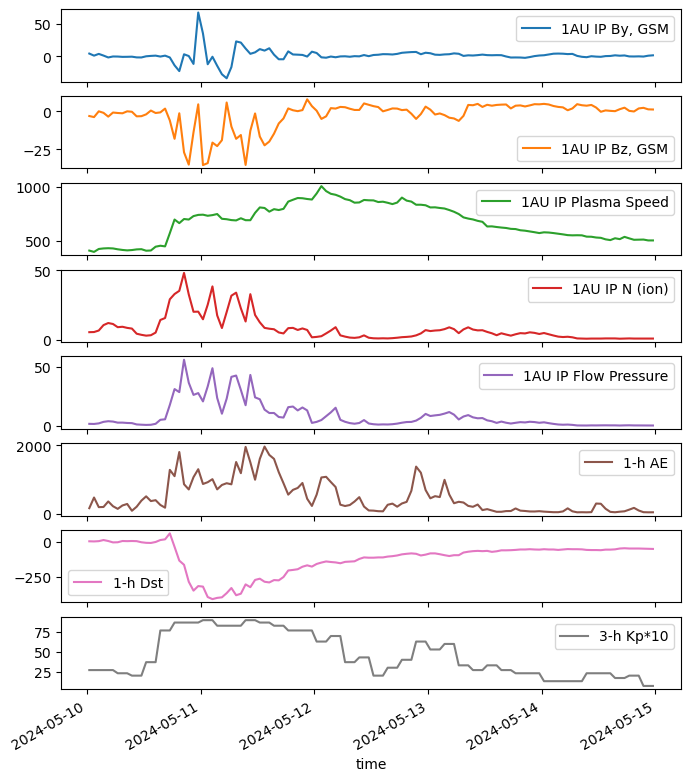

In [ ]:
df.plot(subplots=True, figsize=(8, 10));

In [ ]:
t = Table.from_pandas(df)
t

"1AU IP By, GSM","1AU IP Bz, GSM",1AU IP Plasma Speed,1AU IP N (ion),1AU IP Flow Pressure,1-h AE,1-h Dst,3-h Kp*10
float64,float64,float64,float64,float64,float64,float64,float64
4.1,-3.0,410.0,5.4,1.85,168.0,4.0,27.0
0.9,-3.7,398.0,5.5,1.76,479.0,3.0,27.0
3.6,0.1,425.0,6.6,2.24,198.0,5.0,27.0
1.0,-0.9,430.0,10.5,3.53,203.0,13.0,27.0
-1.9,-3.4,432.0,12.0,4.07,364.0,6.0,27.0
-0.4,-0.7,430.0,11.3,3.77,225.0,-4.0,27.0
-0.5,-1.0,422.0,9.0,2.87,148.0,-3.0,23.0
-1.0,-1.2,416.0,9.3,2.89,247.0,6.0,23.0
-0.9,0.1,412.0,8.5,2.59,291.0,5.0,23.0


In [ ]:
times = []

file = 'data/OMNI2_H0_MRG1HR_3729811.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    line = full_txt.readline()
    if not line:
        break
    
    if "#" not in line:
        row += 1
        columns = line.split()

        if row == 1: header = columns
        elif row == 2: units = columns
        else:
            date_time = columns[0][-4:] + '-' + columns[0][3:5] + '-' + columns[0][:2] + ' ' + columns[1]
            date_time = Time(date_time, format='iso')
            times.append(date_time)
full_txt.close()

In [ ]:
ts = TimeSeries(time=times, data=t)
ts

time,"1AU IP By, GSM","1AU IP Bz, GSM",1AU IP Plasma Speed,1AU IP N (ion),1AU IP Flow Pressure,1-h AE,1-h Dst,3-h Kp*10
Time,float64,float64,float64,float64,float64,float64,float64,float64
2024-05-10 00:30:00.000,4.1,-3.0,410.0,5.4,1.85,168.0,4.0,27.0
2024-05-10 01:30:00.000,0.9,-3.7,398.0,5.5,1.76,479.0,3.0,27.0
2024-05-10 02:30:00.000,3.6,0.1,425.0,6.6,2.24,198.0,5.0,27.0
2024-05-10 03:30:00.000,1.0,-0.9,430.0,10.5,3.53,203.0,13.0,27.0
2024-05-10 04:30:00.000,-1.9,-3.4,432.0,12.0,4.07,364.0,6.0,27.0
2024-05-10 05:30:00.000,-0.4,-0.7,430.0,11.3,3.77,225.0,-4.0,27.0
2024-05-10 06:30:00.000,-0.5,-1.0,422.0,9.0,2.87,148.0,-3.0,23.0
2024-05-10 07:30:00.000,-1.0,-1.2,416.0,9.3,2.89,247.0,6.0,23.0
2024-05-10 08:30:00.000,-0.9,0.1,412.0,8.5,2.59,291.0,5.0,23.0


In [ ]:
ts['1AU IP By, GSM'].unit = u.nT
ts['1AU IP Bz, GSM'].unit = u.nT
ts['1AU IP N (ion)'].unit = u.cm**-3
ts['1AU IP Plasma Speed'].unit = u.km/u.s
ts['1AU IP Flow Pressure'].unit = u.nPa
ts['1-h AE'].unit = u.nT
ts['1-h Dst'].unit = u.nT
ts

time,"1AU IP By, GSM","1AU IP Bz, GSM",1AU IP Plasma Speed,1AU IP N (ion),1AU IP Flow Pressure,1-h AE,1-h Dst,3-h Kp*10
,nT,nT,km / s,1 / cm3,nPa,nT,nT,
Time,float64,float64,float64,float64,float64,float64,float64,float64
2024-05-10 00:30:00.000,4.1,-3.0,410.0,5.4,1.85,168.0,4.0,27.0
2024-05-10 01:30:00.000,0.9,-3.7,398.0,5.5,1.76,479.0,3.0,27.0
2024-05-10 02:30:00.000,3.6,0.1,425.0,6.6,2.24,198.0,5.0,27.0
2024-05-10 03:30:00.000,1.0,-0.9,430.0,10.5,3.53,203.0,13.0,27.0
2024-05-10 04:30:00.000,-1.9,-3.4,432.0,12.0,4.07,364.0,6.0,27.0
2024-05-10 05:30:00.000,-0.4,-0.7,430.0,11.3,3.77,225.0,-4.0,27.0
2024-05-10 06:30:00.000,-0.5,-1.0,422.0,9.0,2.87,148.0,-3.0,23.0
2024-05-10 07:30:00.000,-1.0,-1.2,416.0,9.3,2.89,247.0,6.0,23.0


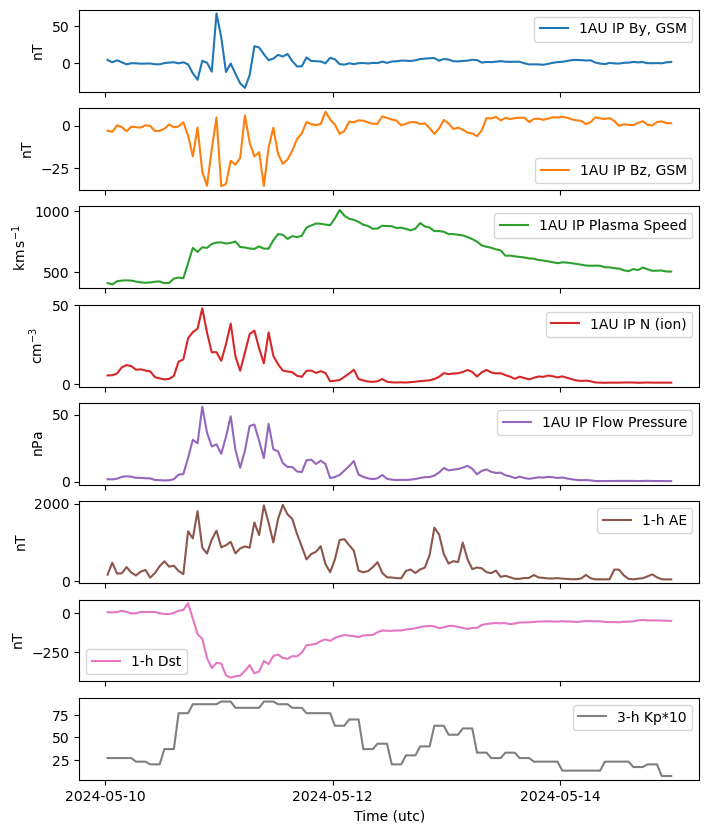

In [ ]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
with quantity_support():
    with time_support():
        fig = plt.figure(figsize=(8, 10))
        axes = fig.subplots(nrows=len(list(ts.columns)[1:]), sharex=True)
        axes = axes.flatten()
        for i, lbl in enumerate(list(ts.columns)[1:]):
            axes[i].plot(ts.time, ts[lbl], label=lbl, color=colors[i])
            axes[i].legend()
        plt.show()

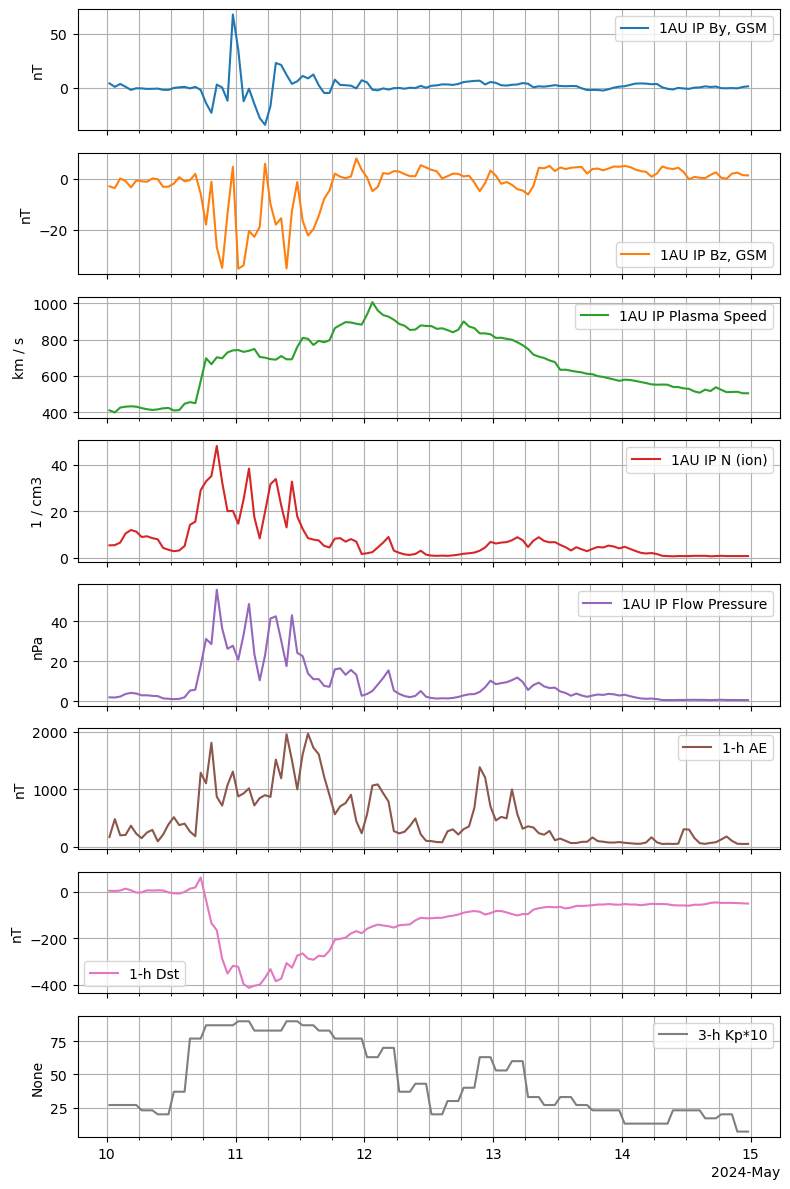

In [ ]:
fig = plt.figure(figsize=(8, 12))
axes = fig.subplots(nrows=len(list(ts.columns)[1:]), sharex=True)
axes = axes.flatten()
for i, lbl in enumerate(list(ts.columns)[1:]):
    axes[i].plot(ts.time.datetime, ts[lbl].value, label=lbl, color=colors[i])
    axes[i].set_ylabel(f'{ts[lbl].unit}')
    axes[i].legend()
    axes[i].grid(which='both')
locator = mdates.DayLocator()
formatter = mdates.ConciseDateFormatter(locator)
axes[-1].xaxis.set_major_locator(locator)
axes[-1].xaxis.set_major_formatter(formatter)
locator = mdates.HourLocator(byhour=range(0, 24, 6))
axes[-1].xaxis.set_minor_locator(locator)
fig.tight_layout()
plt.show()

### GOES-16_MAGN-L2-HIRES_DN

In [ ]:
file = 'data/DN_MAGN-L2-HIRES_G16_119846.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    line = full_txt.readline()
    if not line:
        break
    
    if "#" not in line:
        row += 1
        columns = line.split()

        if row == 1: header = columns
        elif row == 2: pass
        elif row == 3: units = columns
        else:
            break
full_txt.close()
print(header)
print(units)
print(columns)

['UT', 'X_GSE', 'Y_GSE', 'Z_GSE']
['dd-mm-yyyy', 'hh:mm:ss.ms', '[nT]', '[nT]', '[nT]']
['10-05-2024', '15:00:00.000', '17.5464', '52.3054', '118.009']


In [ ]:
date_time = columns[0][-4:] + '-' + columns[0][3:5] + '-' + columns[0][:2] + ' ' + columns[1]
print(date_time)
print(Time(date_time, format='iso'))
print(datetime.datetime.strptime(date_time[:-4], '%Y-%m-%d %H:%M:%S'))

2024-05-10 15:00:00.000
2024-05-10 15:00:00.000
2024-05-10 15:00:00


In [ ]:
data = {
    'time': [],
    'Bx_GSM': [],
    'By_GSM': [],
    'Bz_GSM': [],
}
astropy_time = []

file = 'data/DN_MAGN-L2-HIRES_G16_119846.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    line = full_txt.readline()
    if not line:
        break
    
    if "#" not in line:
        row += 1
        columns = line.split()

        if row == 1: header = columns
        elif row == 2: pass
        elif row == 3: units = columns
        else:
            date_time = columns[0][-4:] + '-' + columns[0][3:5] + '-' + columns[0][:2] + ' ' + columns[1]
            date_time = datetime.datetime.strptime(date_time[:-4], '%Y-%m-%d %H:%M:%S')
            data['time'].append(date_time)
            data['Bx_GSM'].append(float(columns[2]))
            data['By_GSM'].append(float(columns[3]))
            data['Bz_GSM'].append(float(columns[4]))
full_txt.close()

In [ ]:
df = pd.DataFrame(data)
df = df.set_index('time')
df

,Bx_GSM,By_GSM,Bz_GSM
time,,,
2024-05-10 15:00:00,17.5464,52.3054,118.0090
2024-05-10 15:00:00,17.5424,52.3028,118.0310
2024-05-10 15:00:00,17.5484,52.2959,117.9960
2024-05-10 15:00:00,17.5463,52.2838,118.0060
2024-05-10 15:00:00,17.5484,52.2959,117.9960
...,...,...,...
2024-05-10 20:59:59,80.3563,-132.0170,100.0600
2024-05-10 20:59:59,80.5915,-131.7400,99.7518
2024-05-10 20:59:59,81.2291,-131.6390,99.2959


In [ ]:
df.describe()

,Bx_GSM,By_GSM,Bz_GSM
count,216000.000000,216000.000000,216000.000000
mean,4.315024,-34.162112,8.776520
std,44.815265,86.028056,131.718338
min,-122.359000,-240.321000,-238.123000
25%,-29.279425,-99.743750,-116.206500
50%,14.393900,-27.465950,26.607550
75%,19.907125,42.485375,128.523250
max,219.518000,215.434000,262.227000


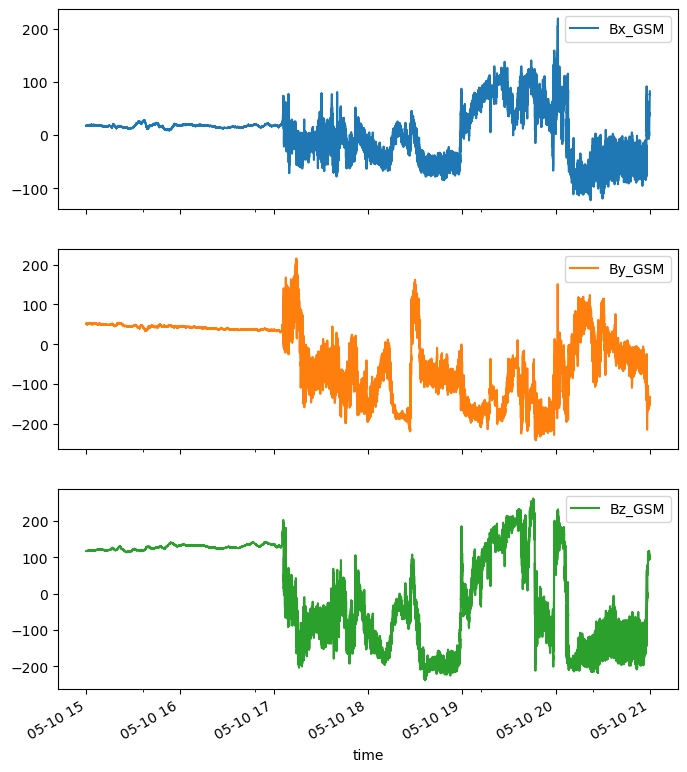

In [ ]:
df.plot(subplots=True, figsize=(8, 10));

In [ ]:
ts = TimeSeries(data)
ts

time,Bx_GSM,By_GSM,Bz_GSM
Time,float64,float64,float64
2024-05-10 15:00:00,17.5464,52.3054,118.009
2024-05-10 15:00:00,17.5424,52.3028,118.031
2024-05-10 15:00:00,17.5484,52.2959,117.996
2024-05-10 15:00:00,17.5463,52.2838,118.006
2024-05-10 15:00:00,17.5484,52.2959,117.996
2024-05-10 15:00:00,17.5463,52.2838,118.006
2024-05-10 15:00:00,17.5505,52.308,117.987
2024-05-10 15:00:00,17.5309,52.2843,118.003
2024-05-10 15:00:00,17.5481,52.2526,117.991


In [ ]:
ts['Bx_GSM'].unit = u.nT
ts['By_GSM'].unit = u.nT
ts['Bz_GSM'].unit = u.nT
ts

time,Bx_GSM,By_GSM,Bz_GSM
,nT,nT,nT
Time,float64,float64,float64
2024-05-10 15:00:00,17.5464,52.3054,118.009
2024-05-10 15:00:00,17.5424,52.3028,118.031
2024-05-10 15:00:00,17.5484,52.2959,117.996
2024-05-10 15:00:00,17.5463,52.2838,118.006
2024-05-10 15:00:00,17.5484,52.2959,117.996
2024-05-10 15:00:00,17.5463,52.2838,118.006
2024-05-10 15:00:00,17.5505,52.308,117.987
2024-05-10 15:00:00,17.5309,52.2843,118.003


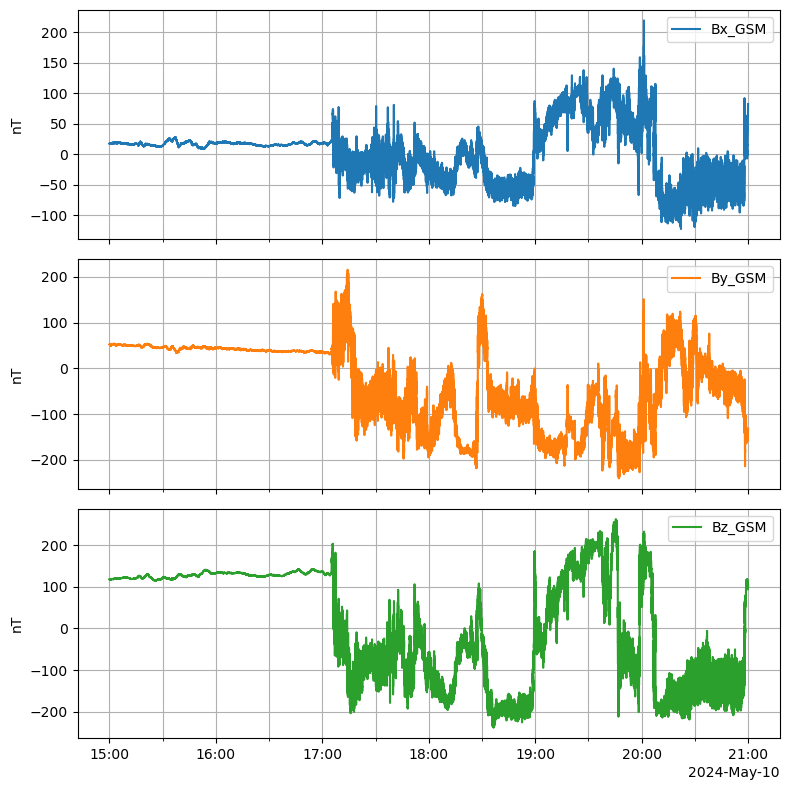

In [ ]:
fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(nrows=len(list(ts.columns)[1:]), sharex=True)
axes = axes.flatten()
for i, lbl in enumerate(list(ts.columns)[1:]):
    axes[i].plot(ts.time.datetime, ts[lbl].value, label=lbl, color=colors[i])
    axes[i].set_ylabel(f'{ts[lbl].unit}')
    axes[i].legend()
    axes[i].grid(which='both')
locator = mdates.HourLocator()
formatter = mdates.ConciseDateFormatter(locator)
axes[-1].xaxis.set_major_locator(locator)
axes[-1].xaxis.set_major_formatter(formatter)
locator = mdates.MinuteLocator(byminute=range(0, 60, 30))
axes[-1].xaxis.set_minor_locator(locator)
fig.tight_layout()
plt.show()

### GOES-18_MAGN-L2-HIRES_DN

In [ ]:
file = 'data/DN_MAGN-L2-HIRES_G18_119846.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    line = full_txt.readline()
    if not line:
        break
    
    if "#" not in line:
        row += 1
        columns = line.split()

        if row == 1: header = columns
        elif row == 2: pass
        elif row == 3: units = columns
        else:
            break
full_txt.close()
print(header)
print(units)
print(columns)

['UT', 'X_GSE', 'Y_GSE', 'Z_GSE']
['dd-mm-yyyy', 'hh:mm:ss.ms', 'nT', 'nT', 'nT']
['10-05-2024', '15:00:00.000', '55.8171', '45.6310', '71.0385']


In [ ]:
date_time = columns[0][-4:] + '-' + columns[0][3:5] + '-' + columns[0][:2] + ' ' + columns[1]
print(date_time)
print(Time(date_time, format='iso'))
print(datetime.datetime.strptime(date_time[:-4], '%Y-%m-%d %H:%M:%S'))

2024-05-10 15:00:00.000
2024-05-10 15:00:00.000
2024-05-10 15:00:00


In [ ]:
data = {
    'time': [],
    'Bx_GSM': [],
    'By_GSM': [],
    'Bz_GSM': [],
}
astropy_time = []

file = 'data/DN_MAGN-L2-HIRES_G18_119846.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    line = full_txt.readline()
    if not line:
        break
    
    if "#" not in line:
        row += 1
        columns = line.split()

        if row == 1: header = columns
        elif row == 2: pass
        elif row == 3: units = columns
        else:
            date_time = columns[0][-4:] + '-' + columns[0][3:5] + '-' + columns[0][:2] + ' ' + columns[1]
            date_time = datetime.datetime.strptime(date_time[:-4], '%Y-%m-%d %H:%M:%S')
            data['time'].append(date_time)
            data['Bx_GSM'].append(float(columns[2]))
            data['By_GSM'].append(float(columns[3]))
            data['Bz_GSM'].append(float(columns[4]))
full_txt.close()

In [ ]:
df = pd.DataFrame(data)
df = df.set_index('time')
df

,Bx_GSM,By_GSM,Bz_GSM
time,,,
2024-05-10 15:00:00,55.8171,45.6310,71.0385
2024-05-10 15:00:00,55.8294,45.6089,71.0288
2024-05-10 15:00:00,55.8485,45.6200,71.0275
2024-05-10 15:00:00,55.8050,45.6309,71.0483
2024-05-10 15:00:00,55.7162,45.6305,71.0630
...,...,...,...
2024-05-10 20:59:59,-45.5789,-81.4816,-135.6250
2024-05-10 20:59:59,-49.0656,-79.1246,-132.5660
2024-05-10 20:59:59,-51.6291,-79.4344,-128.8420


In [ ]:
df.describe()

,Bx_GSM,By_GSM,Bz_GSM
count,216001.000000,216001.000000,216001.000000
mean,-8.841093,-27.617583,-6.002195
std,56.281955,85.013156,103.132574
min,-155.336000,-242.697000,-208.725000
25%,-58.228700,-94.021100,-108.159000
50%,-27.489900,-25.467300,17.152600
75%,52.114200,52.001800,87.648100
max,171.779000,196.050000,210.454000


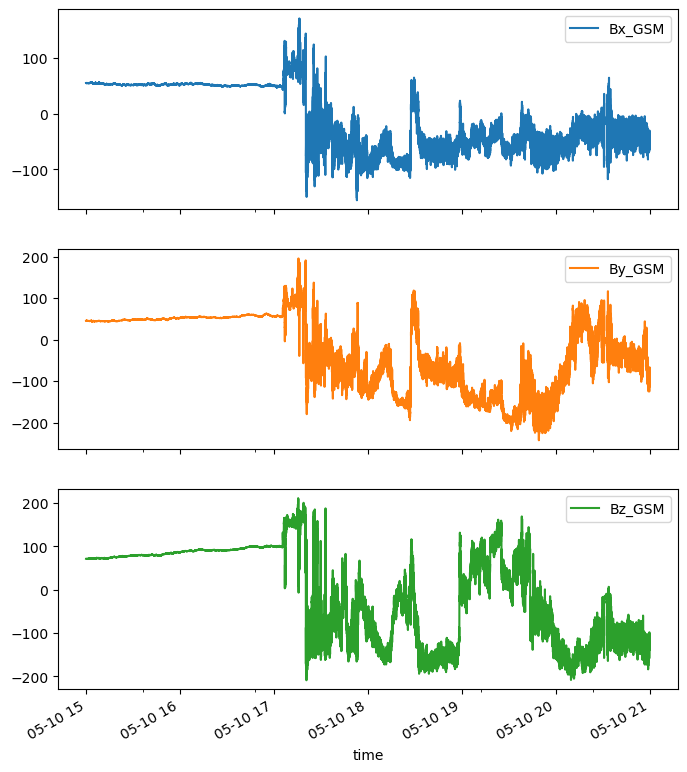

In [ ]:
df.plot(subplots=True, figsize=(8, 10));

In [ ]:
ts = TimeSeries(data)
ts

time,Bx_GSM,By_GSM,Bz_GSM
Time,float64,float64,float64
2024-05-10 15:00:00,55.8171,45.631,71.0385
2024-05-10 15:00:00,55.8294,45.6089,71.0288
2024-05-10 15:00:00,55.8485,45.62,71.0275
2024-05-10 15:00:00,55.805,45.6309,71.0483
2024-05-10 15:00:00,55.7162,45.6305,71.063
2024-05-10 15:00:00,55.706,45.5864,71.1003
2024-05-10 15:00:00,55.7529,45.5979,71.1335
2024-05-10 15:00:00,55.7858,45.6314,71.1493
2024-05-10 15:00:00,55.7578,45.6532,71.1146


In [ ]:
ts['Bx_GSM'].unit = u.nT
ts['By_GSM'].unit = u.nT
ts['Bz_GSM'].unit = u.nT
ts

time,Bx_GSM,By_GSM,Bz_GSM
,nT,nT,nT
Time,float64,float64,float64
2024-05-10 15:00:00,55.8171,45.631,71.0385
2024-05-10 15:00:00,55.8294,45.6089,71.0288
2024-05-10 15:00:00,55.8485,45.62,71.0275
2024-05-10 15:00:00,55.805,45.6309,71.0483
2024-05-10 15:00:00,55.7162,45.6305,71.063
2024-05-10 15:00:00,55.706,45.5864,71.1003
2024-05-10 15:00:00,55.7529,45.5979,71.1335
2024-05-10 15:00:00,55.7858,45.6314,71.1493


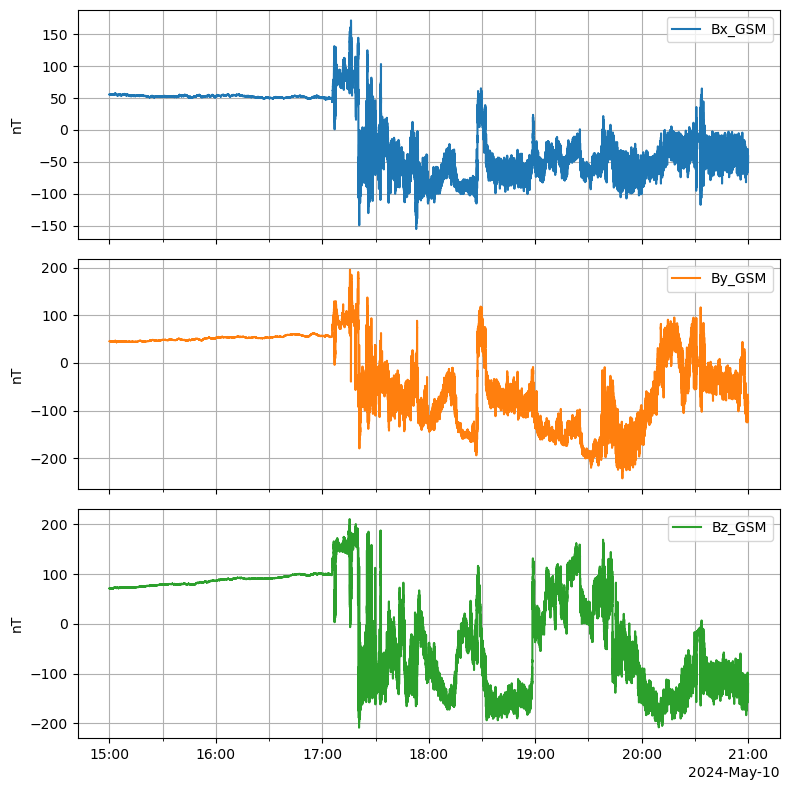

In [ ]:
fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(nrows=len(list(ts.columns)[1:]), sharex=True)
axes = axes.flatten()
for i, lbl in enumerate(list(ts.columns)[1:]):
    axes[i].plot(ts.time.datetime, ts[lbl].value, label=lbl, color=colors[i])
    axes[i].set_ylabel(f'{ts[lbl].unit}')
    axes[i].legend()
    axes[i].grid(which='both')
locator = mdates.HourLocator()
formatter = mdates.ConciseDateFormatter(locator)
axes[-1].xaxis.set_major_locator(locator)
axes[-1].xaxis.set_major_formatter(formatter)
locator = mdates.MinuteLocator(byminute=range(0, 60, 30))
axes[-1].xaxis.set_minor_locator(locator)
fig.tight_layout()
plt.show()